In [1]:
%matplotlib inline

In [2]:
import sys
import numpy as np
import pandas as pd
import re as re
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
train_uid_df = pd.read_csv('../data/train/train_uid_df.csv', header = 0)

In [4]:
print(train_uid_df.head(10))

   uid  label
0    1      0
1    2      0
2    3      0
3    4      0
4    5      0
5    6      0
6    7      0
7    8      0
8    9      0
9   10      0


In [5]:
train_voice_df = pd.read_csv('../data/train/train_voice_df.csv', header = 0, dtype = {'opp_num':str})

d:\program files (x86)\python\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
print(train_voice_df.head(10))

    uid                           opp_num opp_head  opp_len  start_time  \
0   113  38D54642A237A11BB18455FC1E505292      132       11    26115956   
1   113  38D54642A237A11BB18455FC1E505292      132       11    26115623   
2   113  38D54642A237A11BB18455FC1E505292      132       11    26174233   
3   113  38D54642A237A11BB18455FC1E505292      132       11    26070423   
4  3340  010A66F2AD42C48C44897A3DEC96A2A1      139       11    26201745   
5  3340  BC16EA96F7447486FE25AC2BB7A665EF      185       11    26060320   
6  3340  EE497EAB9DA2FB0805390237F983D454      100        7    26061046   
7  3340  010A66F2AD42C48C44897A3DEC96A2A1      139       11    26192655   
8  2016  5D2654B214731E788C5206A96BD6DA59      139       11    26112314   
9  2016  084501372689ECABD58FBB3E7FF254B8      131       11    26112217   

   end_time  call_type  in_out  
0  26120033          1       1  
1  26115707          1       1  
2  26174321          1       1  
3  26070512          1       0  
4  262018

In [7]:
train_sms_df = pd.read_csv('../data/train/train_sms_df.csv', header = 0, dtype = {'opp_num':str})

In [6]:
train_wa_df = pd.read_csv('../data/train/train_wa_df.csv', header = 0)

In [7]:
print(train_sms_df.head(10))

NameError: name 'train_sms_df' is not defined

In [8]:
print(train_wa_df.head(15))

    uid   wa_name  visit_cnt  visit_dura  up_flow  down_flow  wa_type  date
0     1     155导航          5         207      313        457        0    14
1     1     155导航          7         396      547        659        0     4
2     1     155导航         10        3212      781        941        0    12
3     1     155导航         14         723     1094       1318        0    10
4     1     155导航         18         990     1406       1694        0    11
5     1     360借条          2         105      112        272        1    12
6     1     360借条          4        7428     3680       1076        1     9
7     1     360借条         10       11419    10535       3434        1     1
8     1     360借条         14       10051    13635       4318        1    11
9     1     360借条         22       17542    29674       8774        1     4
10    1     360借条         24       16316    19319       6324        1    10
11    1  360安全中心网          3        2317      558       1250        0    14
12    1  360

In [11]:
tmp = train_voice_df['opp_head'].value_counts()

In [12]:
tmp

130    185677
139     77431
138     73586
132     46799
131     43070
137     42624
159     38298
186     38120
151     37005
189     34287
158     34071
152     29480
150     27355
180     27343
136     26138
133     24773
187     23428
153     22950
156     22193
182     20955
135     20600
130     20484
185     18864
51      18105
183     16548
181     15280
188     14124
177     13635
134     11811
173      7651
        ...  
680         1
123         1
023         1
665         1
666         1
110         1
570         1
118         1
572         1
578         1
852         1
652         1
081         1
807         1
003         1
803         1
881         1
883         1
603         1
961         1
894         1
226         1
238         1
239         1
286         1
289         1
297         1
310         1
333         1
110         1
Name: opp_head, Length: 550, dtype: int64

In [13]:
tmp.value_counts()

1         96
2         52
3         27
5         23
7         18
4         17
6         15
9         10
12        10
11         8
14         8
8          7
33         5
59         5
20         5
19         5
21         5
13         5
10         5
16         4
40         4
75         4
24         4
28         4
18         4
17         3
34         3
49         3
41         3
39         3
          ..
209        1
202        1
24773      1
1213       1
16548      1
976        1
34071      1
293        1
1509       1
319        1
7651       1
1505       1
20955      1
473        1
465        1
459        1
451        1
441        1
18864      1
22950      1
38298      1
409        1
391        1
1409       1
379        1
1401       1
337        1
185677     1
13635      1
163        1
Name: opp_head, Length: 187, dtype: int64

In [14]:
train_voice_df['uid'].value_counts()

3902    8129
3616    5970
4173    4766
2341    4734
4484    4048
4498    3919
4488    3677
3463    3511
4460    3111
4472    3058
2425    2945
4534    2873
3709    2789
3277    2692
4780    2664
4476    2614
4482    2609
4445    2605
905     2550
4471    2450
4510    2423
2819    2385
3296    2374
2146    2357
819     2341
75      2320
4459    2313
4495    2266
4829    2253
4466    2233
        ... 
3367       1
4414       1
3915       1
579        1
3822       1
559        1
4725       1
4327       1
993        1
501        1
1742       1
3297       1
2762       1
4383       1
3476       1
4916       1
38         1
4917       1
989        1
4988       1
894        1
215        1
3039       1
2974       1
4128       1
4739       1
3519       1
4311       1
4413       1
684        1
Name: uid, Length: 4987, dtype: int64

In [15]:
train_uid_df.label.value_counts()

0    4099
1     900
Name: label, dtype: int64

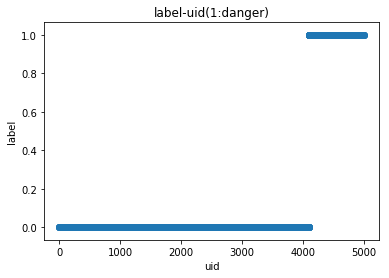

In [16]:
plt.scatter(train_uid_df.uid, train_uid_df.label)
plt.ylabel(u"label")
plt.xlabel(u"uid")
plt.title(u"label-uid(1:danger)")
plt.show()

In [18]:
print(train_wa_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807542 entries, 0 to 4807541
Data columns (total 8 columns):
uid           int64
wa_name       object
visit_cnt     int64
visit_dura    int64
up_flow       int64
down_flow     int64
wa_type       int64
date          int64
dtypes: int64(7), object(1)
memory usage: 293.4+ MB
None


In [19]:
print(train_wa_df.head(20))

    uid   wa_name  visit_cnt  visit_dura  up_flow  down_flow  wa_type  date
0     1     155导航          5         207      313        457        0    14
1     1     155导航          7         396      547        659        0     4
2     1     155导航         10        3212      781        941        0    12
3     1     155导航         14         723     1094       1318        0    10
4     1     155导航         18         990     1406       1694        0    11
5     1     360借条          2         105      112        272        1    12
6     1     360借条          4        7428     3680       1076        1     9
7     1     360借条         10       11419    10535       3434        1     1
8     1     360借条         14       10051    13635       4318        1    11
9     1     360借条         22       17542    29674       8774        1     4
10    1     360借条         24       16316    19319       6324        1    10
11    1  360安全中心网          3        2317      558       1250        0    14
12    1  360

In [12]:
tmp = train_wa_df.uid.value_counts()
tmp = tmp.sort_index()
print(tmp)

1       1155
2         29
3       1167
4       1680
5        641
6        485
7       1316
8       1068
9       1068
10        87
11      1148
12      1655
13      1433
14      1312
15       286
16       827
17       841
18         6
19      1230
20       883
21         1
22       548
23       385
24      1388
25       759
26      1228
27      1865
28       714
29      2507
30      1505
        ... 
4970     230
4971     245
4972     255
4973     285
4974     125
4975     151
4976     279
4977     130
4978    1380
4979      23
4980     312
4981     511
4982    1675
4983     955
4984     929
4985      72
4986      20
4987      10
4988      41
4989      89
4990     605
4991     379
4992     225
4993     839
4994     408
4995    1225
4996     955
4997     832
4998     872
4999     565
Name: uid, Length: 4945, dtype: int64


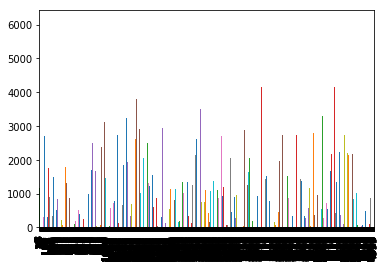

In [13]:
tmp.plot(kind='bar')

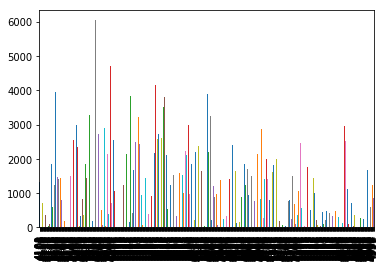

In [15]:
tmp[tmp.index >= 4100].plot(kind='bar')

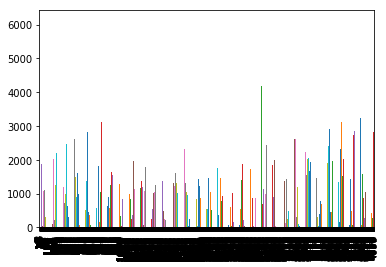

In [16]:
tmp[tmp.index < 4100].plot(kind='bar')

In [17]:
tmp1 = tmp[tmp.index < 4100]
tmp2 = tmp[tmp.index >= 4100]

In [20]:
print(tmp1.describe())

count    4048.000000
mean      925.246789
std       872.481519
min         1.000000
25%       152.000000
50%       741.500000
75%      1432.000000
max      6128.000000
Name: uid, dtype: float64


In [21]:
print(tmp2.describe())

count     897.000000
mean     1184.105909
std      1043.490662
min         1.000000
25%       246.000000
50%       934.000000
75%      1943.000000
max      6037.000000
Name: uid, dtype: float64


In [24]:
tmp.to_csv('../data/train/train_feature_num_records.csv', index=True)

In [30]:
dict = tmp.to_dict()

In [31]:
print(dict)

{1L: 1155L, 2L: 29L, 3L: 1167L, 4L: 1680L, 5L: 641L, 6L: 485L, 7L: 1316L, 8L: 1068L, 9L: 1068L, 10L: 87L, 11L: 1148L, 12L: 1655L, 13L: 1433L, 14L: 1312L, 15L: 286L, 16L: 827L, 17L: 841L, 18L: 6L, 19L: 1230L, 20L: 883L, 21L: 1L, 22L: 548L, 23L: 385L, 24L: 1388L, 25L: 759L, 26L: 1228L, 27L: 1865L, 28L: 714L, 29L: 2507L, 30L: 1505L, 31L: 2001L, 32L: 2178L, 33L: 768L, 34L: 1366L, 36L: 4L, 37L: 1865L, 38L: 338L, 39L: 475L, 40L: 25L, 41L: 790L, 42L: 1004L, 43L: 1170L, 44L: 1637L, 45L: 2841L, 46L: 30L, 47L: 707L, 48L: 1599L, 49L: 639L, 50L: 1763L, 51L: 1598L, 53L: 1064L, 54L: 581L, 55L: 177L, 56L: 121L, 57L: 1422L, 58L: 846L, 59L: 17L, 60L: 1L, 61L: 22L, 62L: 20L, 63L: 899L, 64L: 310L, 65L: 1118L, 66L: 5L, 67L: 1076L, 68L: 187L, 69L: 2L, 70L: 580L, 71L: 1516L, 72L: 723L, 73L: 38L, 74L: 335L, 75L: 1479L, 76L: 1167L, 77L: 315L, 78L: 1145L, 79L: 2692L, 80L: 1103L, 81L: 607L, 82L: 1752L, 83L: 1671L, 84L: 522L, 85L: 450L, 86L: 137L, 87L: 464L, 88L: 753L, 89L: 129L, 90L: 1L, 91L: 726L, 92L: 792L, 9

In [42]:
tmp2 = pd.Series(index = range(1, 5000), data = dict, dtype = np.int)

In [54]:
tmp2 = tmp2.fillna(0)

In [56]:
tmp2 = tmp2.astype('int')

In [57]:
print(tmp2)

1       1155
2         29
3       1167
4       1680
5        641
6        485
7       1316
8       1068
9       1068
10        87
11      1148
12      1655
13      1433
14      1312
15       286
16       827
17       841
18         6
19      1230
20       883
21         1
22       548
23       385
24      1388
25       759
26      1228
27      1865
28       714
29      2507
30      1505
        ... 
4970     230
4971     245
4972     255
4973     285
4974     125
4975     151
4976     279
4977     130
4978    1380
4979      23
4980     312
4981     511
4982    1675
4983     955
4984     929
4985      72
4986      20
4987      10
4988      41
4989      89
4990     605
4991     379
4992     225
4993     839
4994     408
4995    1225
4996     955
4997     832
4998     872
4999     565
Length: 4999, dtype: int32


In [58]:
tmp2.to_csv('../data/train/train_feature_num_records.csv', index=True)

In [59]:
tmp1 = train_wa_df[train_wa_df['uid'] < 4100]

In [60]:
tmp2 = train_wa_df[train_wa_df['uid'] >= 4100]

In [61]:
print(tmp1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3745399 entries, 0 to 4482888
Data columns (total 8 columns):
uid           int64
wa_name       object
visit_cnt     int64
visit_dura    int64
up_flow       int64
down_flow     int64
wa_type       int64
date          int64
dtypes: int64(7), object(1)
memory usage: 257.2+ MB
None


In [70]:
tmp = train_wa_df[['uid', 'visit_cnt', 'visit_dura', 'up_flow', 'down_flow']].groupby('uid').sum()

In [76]:
print(tmp.head(40))

     visit_cnt  visit_dura     up_flow    down_flow
uid                                                
1        97694   111717951   198982664    961584381
2          178      441653      128573        94749
3        23793    29725658    71003943   1302232575
4        56631    68759582   305322754   3498333063
5        13835    16348226    40537809    227950020
6         7472     8371578    63020129    230621263
7        38916    42931191   122874603   1414949738
8        28601    33408610    84662263    784702356
9        30084    38000355   171232060   2068118894
10        6957     7216031     9244460    210398232
11       39056    44577754   199550391   1541267930
12       48163    63137099   172470193   1033096558
13       33466    39840202   122998271    692934170
14       30490    38225863   112707809   1930970015
15        2871     5675466    14771369     17887307
16       13447    17380650    59938844    919469789
17       17413    19782279   246482473    453305348
18          

In [83]:
tmp[tmp.index < 4100].describe()

,visit_cnt,visit_dura,up_flow,down_flow
count,4048.000000,4.048000e+03,4.048000e+03,4.048000e+03
mean,36331.184289,4.607508e+07,2.378945e+08,2.936611e+09
std,51243.930327,6.556163e+07,5.441075e+08,6.653284e+09
min,1.000000,0.000000e+00,4.000000e+01,0.000000e+00
25%,2009.000000,2.639848e+06,5.773771e+06,3.839876e+07
50%,17127.500000,2.159831e+07,6.395515e+07,5.678749e+08
75%,50185.500000,6.233678e+07,2.382578e+08,2.337112e+09
max,524144.000000,6.482617e+08,1.251746e+10,1.051268e+11


In [82]:
tmp[tmp.index >= 4100].describe()

,visit_cnt,visit_dura,up_flow,down_flow
count,897.000000,8.970000e+02,8.970000e+02,8.970000e+02
mean,56120.462653,7.101805e+07,3.968095e+08,5.109441e+09
std,64044.075217,8.136362e+07,6.323265e+08,8.534771e+09
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5781.000000,7.519787e+06,2.030270e+07,1.711921e+08
50%,35952.000000,4.615938e+07,1.684659e+08,1.512038e+09
75%,86745.000000,1.113219e+08,5.006677e+08,5.364908e+09
max,410960.000000,4.959533e+08,6.514391e+09,5.800676e+10


In [85]:
dict = tmp.to_dict()

In [86]:
print(dict)

{'visit_dura': {1L: 111717951L, 2L: 441653L, 3L: 29725658L, 4L: 68759582L, 5L: 16348226L, 6L: 8371578L, 7L: 42931191L, 8L: 33408610L, 9L: 38000355L, 10L: 7216031L, 11L: 44577754L, 12L: 63137099L, 13L: 39840202L, 14L: 38225863L, 15L: 5675466L, 16L: 17380650L, 17L: 19782279L, 18L: 40796L, 19L: 49739351L, 20L: 18767708L, 21L: 5606L, 22L: 16682362L, 23L: 17560175L, 24L: 38318274L, 25L: 30547508L, 26L: 37019367L, 27L: 44313514L, 28L: 34598759L, 29L: 238338524L, 30L: 89754284L, 31L: 42891093L, 32L: 57090993L, 33L: 112642693L, 34L: 49047258L, 36L: 606L, 37L: 55344914L, 38L: 15110404L, 39L: 11577246L, 40L: 284938L, 41L: 17169986L, 42L: 19965506L, 43L: 45351954L, 44L: 89905571L, 45L: 91593526L, 46L: 31387L, 47L: 15165630L, 48L: 55933012L, 49L: 21731496L, 50L: 61639736L, 51L: 68260098L, 53L: 29033238L, 54L: 9283636L, 55L: 6171394L, 56L: 1156563L, 57L: 78368046L, 58L: 24548009L, 59L: 93562L, 60L: 3212L, 61L: 207524L, 62L: 46149L, 63L: 40945266L, 64L: 3436350L, 65L: 65234582L, 66L: 4250L, 67L: 188

In [95]:
tmp2 = pd.DataFrame(index = range(1, 5000), data = dict)

In [96]:
tmp2 = tmp2.fillna(0)
print(tmp2[tmp2.index == 35])

    down_flow  up_flow  visit_cnt  visit_dura
35        0.0      0.0        0.0         0.0


In [97]:
tmp2.loc[:, ['down_flow', 'up_flow', 'visit_dura', 'visit_cnt']] = tmp2.loc[:, ['down_flow', 'up_flow', 'visit_dura', 'visit_cnt']].astype('int64')

In [98]:
print(tmp2)

        down_flow     up_flow  visit_cnt  visit_dura
1       961584381   198982664      97694   111717951
2           94749      128573        178      441653
3      1302232575    71003943      23793    29725658
4      3498333063   305322754      56631    68759582
5       227950020    40537809      13835    16348226
6       230621263    63020129       7472     8371578
7      1414949738   122874603      38916    42931191
8       784702356    84662263      28601    33408610
9      2068118894   171232060      30084    38000355
10      210398232     9244460       6957     7216031
11     1541267930   199550391      39056    44577754
12     1033096558   172470193      48163    63137099
13      692934170   122998271      33466    39840202
14     1930970015   112707809      30490    38225863
15       17887307    14771369       2871     5675466
16      919469789    59938844      13447    17380650
17      453305348   246482473      17413    19782279
18          29014       31042         17      

In [100]:
tmp2.to_csv('../data/train/train_feature_2to5.csv', index=True)

In [116]:
group = train_wa_df.groupby('uid')['wa_name']
print(group.unique())

uid
1       [155导航, 360借条, 360安全中心网, 360影视大全, 360搜索, 360网址...
2       [Web上网流量（Get）, Web上网流量（Post）, 未识别TCP业务流量, 网络连接...
3       [360借条, 360公共资源, 360安全中心网, 360手机卫士, 3GPP, A8音乐...
4       [135编辑器官网, 365地产家居网, 39健康网, 3GPP, 51Yes网站流量统计,...
5       [360安全中心网, CNZZ, DNS查询流量, K歌达人, MIUI米柚, MM131美...
6       [139上网导航, 155导航, 1688采购批发网, 17k小说网, 5068儿童网, 5...
7       [139上网导航, 155导航, 360借条, 360安全中心网, 360影视大全, 360...
8       [58同城, APP积分运营服务平台, AccuWeather, AppStore, App...
9       [139上网导航, 360借条, 360安全中心网, AccuWeather, AdMast...
10      [IZAT, MIUI米柚, NIST, YY语音, 个推推送, 全球可用的NTP服务器列表...
11      [2345网址导航, 360安全中心网, 58同城, APP积分运营服务平台, AccuWe...
12      [1号店, 39健康网, 3GPP, ADPush营销平台, AdMaster精硕科技, A...
13      [1688采购批发网, 360借条, 51Yes网站流量统计, 51vv视频社区, 88度C...
14      [360公共资源, 58同城, 8684公交, 95美女秀, ADINALL, ADSENS...
15      [1号店, 360借条, 360安全中心网, CNZZ, EEPW电子产品世界, Messe...
16      [ADPush营销平台, APPLE, AccuWeather, AppStore, BIL...
17      [139上网导航, 360doc个人图书馆, 360借条, 360安全中心网, 360手机卫...
18        

In [113]:
agg = group.aggregate({'wa_name': lambda x: x.nunique()})

d:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [117]:
print(type(agg))

<class 'pandas.core.frame.DataFrame'>


In [119]:
print(agg[agg.index < 4100].describe())

           wa_name
count  4048.000000
mean    151.328804
std     115.902818
min       1.000000
25%      48.000000
50%     145.000000
75%     228.000000
max     789.000000


In [121]:
print(agg[agg.index >= 4100].describe())

          wa_name
count  897.000000
mean   186.510591
std    134.579181
min      1.000000
25%     72.000000
50%    174.000000
75%    279.000000
max    853.000000


In [129]:
print(agg)

      wa_name
uid          
1         181
2           5
3         178
4         298
5         130
6         164
7         209
8         171
9         157
10         32
11        169
12        258
13        227
14        250
15         60
16        162
17        162
18          6
19        199
20        163
21          1
22        136
23         56
24        194
25        138
26        284
27        274
28        101
29        281
30        272
...       ...
4970       56
4971       67
4972       69
4973       80
4974       30
4975       42
4976       64
4977       24
4978      268
4979       23
4980      108
4981      179
4982      229
4983      205
4984      147
4985       50
4986       20
4987       10
4988       33
4989       51
4990      123
4991       86
4992       59
4993      120
4994      119
4995      199
4996      140
4997      134
4998      137
4999      146

[4945 rows x 1 columns]


In [132]:
agg.rename(columns=lambda x:x.replace('wa_name','wa_cnt'), inplace=True)

In [133]:
print(agg)

      wa_cnt
uid         
1        181
2          5
3        178
4        298
5        130
6        164
7        209
8        171
9        157
10        32
11       169
12       258
13       227
14       250
15        60
16       162
17       162
18         6
19       199
20       163
21         1
22       136
23        56
24       194
25       138
26       284
27       274
28       101
29       281
30       272
...      ...
4970      56
4971      67
4972      69
4973      80
4974      30
4975      42
4976      64
4977      24
4978     268
4979      23
4980     108
4981     179
4982     229
4983     205
4984     147
4985      50
4986      20
4987      10
4988      33
4989      51
4990     123
4991      86
4992      59
4993     120
4994     119
4995     199
4996     140
4997     134
4998     137
4999     146

[4945 rows x 1 columns]


In [134]:
dict = agg.to_dict()

In [135]:
print(dict)

{'wa_cnt': {1L: 181L, 2L: 5L, 3L: 178L, 4L: 298L, 5L: 130L, 6L: 164L, 7L: 209L, 8L: 171L, 9L: 157L, 10L: 32L, 11L: 169L, 12L: 258L, 13L: 227L, 14L: 250L, 15L: 60L, 16L: 162L, 17L: 162L, 18L: 6L, 19L: 199L, 20L: 163L, 21L: 1L, 22L: 136L, 23L: 56L, 24L: 194L, 25L: 138L, 26L: 284L, 27L: 274L, 28L: 101L, 29L: 281L, 30L: 272L, 31L: 264L, 32L: 283L, 33L: 185L, 34L: 159L, 36L: 2L, 37L: 229L, 38L: 97L, 39L: 121L, 40L: 13L, 41L: 114L, 42L: 172L, 43L: 232L, 44L: 227L, 45L: 386L, 46L: 3L, 47L: 140L, 48L: 294L, 49L: 95L, 50L: 252L, 51L: 242L, 53L: 188L, 54L: 145L, 55L: 68L, 56L: 20L, 57L: 184L, 58L: 219L, 59L: 10L, 60L: 1L, 61L: 21L, 62L: 15L, 63L: 156L, 64L: 27L, 65L: 153L, 66L: 2L, 67L: 186L, 68L: 52L, 69L: 2L, 70L: 128L, 71L: 218L, 72L: 129L, 73L: 35L, 74L: 95L, 75L: 221L, 76L: 159L, 77L: 83L, 78L: 116L, 79L: 343L, 80L: 235L, 81L: 137L, 82L: 250L, 83L: 310L, 84L: 145L, 85L: 114L, 86L: 23L, 87L: 127L, 88L: 169L, 89L: 37L, 90L: 1L, 91L: 127L, 92L: 171L, 93L: 174L, 94L: 196L, 95L: 103L, 96L: 3L, 9

In [136]:
agg2 = pd.DataFrame(index = range(1, 5000), data = dict)
agg2 = agg2.fillna(0)

In [137]:
print(agg2)

      wa_cnt
1      181.0
2        5.0
3      178.0
4      298.0
5      130.0
6      164.0
7      209.0
8      171.0
9      157.0
10      32.0
11     169.0
12     258.0
13     227.0
14     250.0
15      60.0
16     162.0
17     162.0
18       6.0
19     199.0
20     163.0
21       1.0
22     136.0
23      56.0
24     194.0
25     138.0
26     284.0
27     274.0
28     101.0
29     281.0
30     272.0
...      ...
4970    56.0
4971    67.0
4972    69.0
4973    80.0
4974    30.0
4975    42.0
4976    64.0
4977    24.0
4978   268.0
4979    23.0
4980   108.0
4981   179.0
4982   229.0
4983   205.0
4984   147.0
4985    50.0
4986    20.0
4987    10.0
4988    33.0
4989    51.0
4990   123.0
4991    86.0
4992    59.0
4993   120.0
4994   119.0
4995   199.0
4996   140.0
4997   134.0
4998   137.0
4999   146.0

[4999 rows x 1 columns]


In [141]:
agg2 = agg2.astype('int64')

In [142]:
print(agg2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 1 to 4999
Data columns (total 1 columns):
wa_cnt    4999 non-null int64
dtypes: int64(1)
memory usage: 78.1 KB
None


In [143]:
agg2.to_csv('../data/train/train_feature_6.csv', index=True)

In [148]:
tmp = train_wa_df['date'].value_counts()
tmp = tmp.sort_index()

In [149]:
print(tmp)

1     106105
2     111811
3     127083
4     120246
5     111267
6     114130
7     114713
8     120108
9      96614
10    109893
11    129386
12    110290
13     90715
14    128813
15    140588
16     97462
17    102815
18    112351
19    123060
20     59143
21    113801
22    100736
23    101273
24     90558
25     91193
26    105206
27    103927
28     99602
29     67306
30    103115
31    134575
32    131480
33    115243
34    105956
35    105315
36     94072
37     99591
38    100448
39     84973
40    107429
41    116186
42     96688
43     96195
44    108792
45    107289
Name: date, dtype: int64


In [156]:
tmp = train_sms_df['uid'].value_counts().sort_index()
print(tmp)

1        95
2         1
3        28
4       124
5        48
6        30
7        42
8       379
9        15
10       34
11        5
12      187
13        2
14       95
15       30
16       89
17       55
18       42
19      106
20       76
21        2
22       39
23        2
24      184
25      203
26      134
27      121
28       96
29       53
30       49
       ... 
4970     62
4971     30
4972     22
4973    137
4974     17
4975     36
4976     21
4977     25
4978      1
4979      7
4980     61
4981      1
4982     30
4983     14
4984     19
4985      8
4986     30
4987      7
4988      4
4989      4
4990     30
4991     31
4992     18
4993      7
4994      3
4995      6
4996      2
4997      3
4998      3
4999      6
Name: uid, Length: 4959, dtype: int64


In [163]:
t1 = train_sms_df[train_sms_df['in_out'] == 0]

In [169]:
tmp = t1['uid'].value_counts().sort_index()
print(tmp)

1        39
4        19
5         2
6         1
8       150
11        4
12       36
14        8
16        5
17        8
18        3
19       39
20       11
22        1
23        2
24       61
25       28
26       46
27       31
28        4
30       11
31       10
32       92
33       11
34        9
35        1
37        1
39        5
40       17
42        9
       ... 
4963      1
4965      4
4966      7
4967      5
4968      6
4969      4
4970     50
4971     15
4972     12
4973     57
4974      3
4975     17
4976     11
4977     25
4978      1
4981      1
4982     22
4983     14
4984     19
4986      9
4988      4
4990     24
4991     13
4992     16
4993      2
4994      3
4995      6
4996      2
4997      3
4998      3
Name: uid, Length: 3618, dtype: int64


In [165]:
tmp1 = tmp[tmp.index < 4100]
tmp2 = tmp[tmp.index >= 4100]

In [166]:
tmp1.describe()

count    2959.000000
mean       13.653261
std        32.163892
min         1.000000
25%         2.000000
50%         4.000000
75%        12.000000
max       633.000000
Name: uid, dtype: float64

In [167]:
tmp2.describe()

count     659.000000
mean       53.675266
std       145.993257
min         1.000000
25%         2.000000
50%         6.000000
75%        24.000000
max      1181.000000
Name: uid, dtype: float64

In [168]:
print(tmp2)

4101     12
4102     45
4103      2
4104      8
4105      2
4106      1
4107    686
4108      5
4109     14
4111      4
4113     17
4116     15
4117      2
4118      9
4119      9
4120      8
4121      2
4122      3
4124      2
4125      4
4131      3
4133     29
4135      6
4136      8
4137      1
4138      6
4139     22
4140      2
4142      5
4143      1
       ... 
4963      1
4965      4
4966      7
4967      5
4968      6
4969      4
4970     50
4971     15
4972     12
4973     57
4974      3
4975     17
4976     11
4977     25
4978      1
4981      1
4982     22
4983     14
4984     19
4986      9
4988      4
4990     24
4991     13
4992     16
4993      2
4994      3
4995      6
4996      2
4997      3
4998      3
Name: uid, Length: 659, dtype: int64


In [170]:
dict = tmp.to_dict()
tmp2 = pd.Series(index = range(1, 5000), data = dict)

In [171]:
tmp2 = tmp2.fillna(0)

In [172]:
tmp2 = tmp2.astype('int64')

In [173]:
tmp2.to_csv('../data/train/train_feature_7.csv', index=True)

In [174]:
t2 = train_sms_df[train_sms_df['in_out'] == 1]

In [175]:
tmp = t2['uid'].value_counts().sort_index()

In [176]:
tmp1 = tmp[tmp.index < 4100]
tmp2 = tmp[tmp.index >= 4100]

In [177]:
tmp1.describe()

count    3266.000000
mean       63.237906
std       115.727337
min         1.000000
25%        12.000000
50%        31.000000
75%        75.000000
max      3478.000000
Name: uid, dtype: float64

In [178]:
tmp2.describe()

count    712.000000
mean      29.029494
std       36.342533
min        1.000000
25%        7.000000
50%       17.000000
75%       37.000000
max      270.000000
Name: uid, dtype: float64

In [179]:
dict = tmp.to_dict()
tmp2 = pd.Series(index = range(1, 5000), data = dict)

In [180]:
tmp2 = tmp2.fillna(0)

In [181]:
tmp2 = tmp2.astype('int64')

In [182]:
tmp2.to_csv('../data/train/train_feature_8.csv', index=True)

# Feature 21

In [9]:
group = train_wa_df.groupby('uid')['visit_cnt']
print(group.unique())

uid
1       [5, 7, 10, 14, 18, 2, 4, 22, 24, 3, 23, 109, 1...
2            [4, 6, 1, 2, 13, 3, 7, 9, 16, 22, 14, 24, 8]
3       [1, 2, 3, 5, 6, 7, 10, 11, 15, 4, 12, 71, 106,...
4       [2, 15, 1, 3, 5, 14, 18, 4, 6, 8, 9, 7, 21, 10...
5       [2, 8, 11, 32, 46, 5, 77, 128, 1, 3, 4, 6, 7, ...
6       [1, 15, 17, 6, 7, 8, 13, 16, 22, 29, 36, 72, 3...
7       [2, 6, 4, 5, 18, 1, 8, 21, 7, 11, 32, 41, 270,...
8       [1, 7, 2, 8, 11, 3, 4, 63, 175, 249, 5, 6, 9, ...
9       [2, 7, 93, 12, 3, 5, 16, 10, 122, 1, 4, 6, 46,...
10      [1, 6, 7, 15, 20, 23, 102, 555, 981, 16, 46, 4...
11      [14, 2, 1, 21, 6, 7, 16, 18, 29, 19, 64, 108, ...
12      [1, 2, 6, 7, 9, 4, 3, 5, 10, 18, 21, 23, 19, 2...
13      [1, 4, 2, 3, 51, 8, 9, 18, 144, 266, 324, 5, 7...
14      [2, 1, 3, 6, 11, 4, 16, 5, 7, 13, 55, 90, 96, ...
15      [1, 2, 3, 4, 5, 6, 7, 9, 13, 14, 16, 21, 8, 23...
16      [2, 3, 1, 6, 10, 38, 115, 201, 7, 4, 5, 8, 12,...
17      [1, 4, 2, 6, 7, 21, 28, 3, 67, 90, 122, 5, 11,...
18        

In [10]:
visit_cnt = group.agg(['std', 'var', 'max','min','median','mean','sum', 'count', 'mad']).add_prefix('wa_visit_cnt_')

In [11]:
print(visit_cnt)

      wa_visit_cnt_std  wa_visit_cnt_var  wa_visit_cnt_max  wa_visit_cnt_min  \
uid                                                                            
1           290.475238      84375.863681              3747                 1   
2             6.412734         41.123153                24                 1   
3            62.825353       3947.025006              1227                 1   
4           109.912263      12080.705578              1568                 1   
5            58.997481       3480.702789               620                 1   
6            59.782370       3573.931780               671                 1   
7            90.342535       8161.773601              1385                 1   
8            75.292851       5669.013394               570                 1   
9            72.075247       5194.841296               782                 1   
10          312.227684      97486.126704              2445                 1   
11           84.095565       7072.064079

# Feature 22

In [12]:
visit_dura = train_wa_df.groupby(['uid'])['visit_dura'].agg(['std', 'var', 'max','min','median','mean','sum', 'count', 'mad']).add_prefix('wa_visit_dura_')

In [13]:
print(visit_dura)

      wa_visit_dura_std  wa_visit_dura_var  wa_visit_dura_max  \
uid                                                             
1         296715.319506       8.803998e+10            3009726   
2          19554.843909       3.823919e+08              62819   
3          83464.179838       6.966269e+09            1118099   
4         128052.491187       1.639744e+10            2008191   
5          72239.474882       5.218542e+09             890073   
6          70705.787643       4.999308e+09             972334   
7         110932.747700       1.230607e+10            2039039   
8          89596.617020       8.027554e+09             713696   
9          96882.031426       9.386128e+09             898854   
10        372380.918312       1.386675e+11            2882400   
11         94545.263505       8.938807e+09            1230085   
12        106518.868804       1.134627e+10            1194803   
13         68555.671887       4.699880e+09             924451   
14         97704.985982  

# Feature 23

In [14]:
up_flow = train_wa_df.groupby(['uid'])['up_flow'].agg(['std', 'var', 'max','min','median','mean','sum', 'count', 'mad']).add_prefix('wa_up_flow_')

In [15]:
print(up_flow)

      wa_up_flow_std  wa_up_flow_var  wa_up_flow_max  wa_up_flow_min  \
uid                                                                    
1       7.491854e+05    5.612787e+11        10720264               0   
2       5.429254e+03    2.947680e+07           22319               0   
3       3.566241e+05    1.271808e+11         8915918               0   
4       9.327114e+05    8.699506e+11        27479806               0   
5       5.071817e+05    2.572333e+11        12441601               0   
6       2.105439e+06    4.432873e+12        46095985               0   
7       9.421496e+05    8.876458e+11        32109547               0   
8       3.141883e+05    9.871431e+10         4573135               0   
9       1.750673e+06    3.064857e+12        51606288               0   
10      5.710374e+05    3.260837e+11         4814235              66   
11      1.298793e+06    1.686862e+12        33152266               0   
12      4.637899e+05    2.151010e+11        12324452            

# Feature 24

In [16]:
down_flow = train_wa_df.groupby(['uid'])['down_flow'].agg(['std', 'var', 'max','min','median','mean','sum', 'count', 'mad']).add_prefix('wa_down_flow_')

In [17]:
print(down_flow)

      wa_down_flow_std  wa_down_flow_var  wa_down_flow_max  wa_down_flow_min  \
uid                                                                            
1         4.243115e+06      1.800402e+13          58773144                 0   
2         3.908229e+03      1.527425e+07             15438                 0   
3         1.445421e+07      2.089242e+14         457021859                 0   
4         1.564955e+07      2.449086e+14         513377344                 0   
5         1.617302e+06      2.615667e+12          28858654                 0   
6         5.077495e+06      2.578095e+13         103213976                 0   
7         7.410820e+06      5.492025e+13         112836250                 0   
8         5.089598e+06      2.590400e+13         135764689                 0   
9         1.291060e+07      1.666837e+14         337656393                 0   
10        1.564141e+07      2.446536e+14         138291157                 0   
11        1.300367e+07      1.690955e+14

# Feature 25

In [18]:
group = train_wa_df.groupby('uid')['wa_name']

In [19]:
agg = group.aggregate({'wa_name': lambda x: x.nunique()})

d:\program files (x86)\python\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [20]:
agg.rename(columns=lambda x:x.replace('wa_name','wa_name_count'), inplace=True)

In [21]:
print(agg)

      wa_name_count
uid                
1               181
2                 5
3               178
4               298
5               130
6               164
7               209
8               171
9               157
10               32
11              169
12              258
13              227
14              250
15               60
16              162
17              162
18                6
19              199
20              163
21                1
22              136
23               56
24              194
25              138
26              284
27              274
28              101
29              281
30              272
...             ...
4970             56
4971             67
4972             69
4973             80
4974             30
4975             42
4976             64
4977             24
4978            268
4979             23
4980            108
4981            179
4982            229
4983            205
4984            147
4985             50
4986             20


In [22]:
wa_name = agg

# Feature 26

In [23]:
wa_type = train_wa_df.groupby(['uid','wa_type'])['uid'].count().unstack().add_prefix('wa_type_').fillna(0)

In [24]:
wa_type.columns.names = ['']

In [25]:
print(wa_type)

      wa_type_0  wa_type_1
uid                       
1         955.0      200.0
2          29.0        0.0
3         982.0      185.0
4        1372.0      308.0
5         557.0       84.0
6         409.0       76.0
7        1103.0      213.0
8         914.0      154.0
9         890.0      178.0
10         57.0       30.0
11        985.0      163.0
12       1330.0      325.0
13       1196.0      237.0
14       1151.0      161.0
15        250.0       36.0
16        709.0      118.0
17        732.0      109.0
18          4.0        2.0
19       1054.0      176.0
20        740.0      143.0
21          0.0        1.0
22        439.0      109.0
23        316.0       69.0
24       1194.0      194.0
25        631.0      128.0
26       1017.0      211.0
27       1614.0      251.0
28        520.0      194.0
29       2064.0      443.0
30       1248.0      257.0
...         ...        ...
4970      203.0       27.0
4971      209.0       36.0
4972      225.0       30.0
4973      242.0       43.0
4

# Feature 27

In [26]:
date = train_wa_df.groupby(['uid','date'])['uid'].count().unstack().add_prefix('date_').fillna(0)

In [27]:
date.columns.names = ['']

In [28]:
print(date)

      date_1  date_2  date_3  date_4  date_5  date_6  date_7  date_8  date_9  \
uid                                                                            
1       47.0     0.0    12.0    48.0     4.0    24.0     7.0     2.0    37.0   
2        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3       20.0    20.0    27.0    20.0    33.0    29.0    49.0    31.0    23.0   
4       36.0    83.0    95.0    62.0    49.0    32.0    46.0    39.0    27.0   
5        4.0     4.0     0.0    17.0    40.0     5.0     4.0     0.0     0.0   
6       13.0    12.0    17.0    42.0    91.0    20.0     7.0    12.0    10.0   
7       23.0    26.0     9.0    40.0    37.0    22.0    40.0    44.0    14.0   
8       21.0    36.0    18.0    32.0    20.0    15.0    21.0    27.0    22.0   
9        0.0     0.0     0.0    41.0    27.0    37.0    52.0    31.0    12.0   
10       0.0     0.0     0.0    16.0    16.0    12.0     1.0     0.0     0.0   
11      12.0    32.0    18.0    11.0    

# Merge feature 21 to 27

In [29]:
agg = visit_cnt
agg = agg.join(visit_dura)
agg = agg.join(up_flow)
agg = agg.join(down_flow)
agg = agg.join(wa_name)
agg = agg.join(wa_type)
agg = agg.join(date)

In [29]:
print(agg)

      wa_visit_cnt_std  wa_visit_cnt_var  wa_visit_cnt_max  wa_visit_cnt_min  \
uid                                                                            
1           290.475238      84375.863681              3747                 1   
2             6.412734         41.123153                24                 1   
3            62.825353       3947.025006              1227                 1   
4           109.912263      12080.705578              1568                 1   
5            58.997481       3480.702789               620                 1   
6            59.782370       3573.931780               671                 1   
7            90.342535       8161.773601              1385                 1   
8            75.292851       5669.013394               570                 1   
9            72.075247       5194.841296               782                 1   
10          312.227684      97486.126704              2445                 1   
11           84.095565       7072.064079

In [30]:
print(agg.columns)

Index([u'wa_visit_cnt_std', u'wa_visit_cnt_var', u'wa_visit_cnt_max',
       u'wa_visit_cnt_min', u'wa_visit_cnt_median', u'wa_visit_cnt_mean',
       u'wa_visit_cnt_sum', u'wa_visit_cnt_count', u'wa_visit_cnt_mad',
       u'wa_visit_dura_std', u'wa_visit_dura_var', u'wa_visit_dura_max',
       u'wa_visit_dura_min', u'wa_visit_dura_median', u'wa_visit_dura_mean',
       u'wa_visit_dura_sum', u'wa_visit_dura_count', u'wa_visit_dura_mad',
       u'wa_up_flow_std', u'wa_up_flow_var', u'wa_up_flow_max',
       u'wa_up_flow_min', u'wa_up_flow_median', u'wa_up_flow_mean',
       u'wa_up_flow_sum', u'wa_up_flow_count', u'wa_up_flow_mad',
       u'wa_down_flow_std', u'wa_down_flow_var', u'wa_down_flow_max',
       u'wa_down_flow_min', u'wa_down_flow_median', u'wa_down_flow_mean',
       u'wa_down_flow_sum', u'wa_down_flow_count', u'wa_down_flow_mad',
       u'wa_name_count', u'wa_type_0', u'wa_type_1', u'date_1', u'date_2',
       u'date_3', u'date_4', u'date_5', u'date_6', u'date_7', u'date_8

In [30]:
dict = agg.to_dict()

In [31]:
agg2 = pd.DataFrame(index = range(1, 5000), data = dict)

In [32]:
agg2 = agg2.fillna(0)
agg2 = agg2.astype('int64')

In [33]:
agg2.to_csv('../data/train/train_feature_21to27.csv', index=True, header=None)